# Project - Data Wrangling - Daniel Sellinger

In [1]:
import requests
import os
import pandas as pd
import numpy as np
import tweepy
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Gather

In [2]:
archive = pd.read_csv('twitter_archive_enhanced.csv')

In [3]:
if not os.path.exists('image_predictions.tsv'):
    response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
    with open(os.path.join('image_predictions.tsv'), mode='wb') as file:
        file.write(response.content)

In [4]:
images = pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
# set up Tweepy API

if not os.path.exists('twitter_posts.csv'):
    consumer_key = ###
    consumer_secret = ###
    access_token = ###
    access_secret = ###

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth)

In [6]:
if not os.path.exists('twitter_posts.csv'):
    ids_list = archive['tweet_id']
    tweets_not_found = []
    tweets = ()
    with open ('tweet_json.txt', 'a') as outfile:
        for ids in ids_list:
            try:
                tweets = api.get_status(ids, tweet_mode='extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
                json.dump(tweets._json, outfile)
                outfile.write('\n')
            except:
                print("ID not found")
                tweets_not_found.append(ids)

    print("Ready to continue")

In [7]:
if not os.path.exists('twitter_posts.csv'):
    posts = []
    file = open('tweet_json.txt').read()[1:-2].split('}\n{')
    for jsonline in file:
        data = json.loads("{"+jsonline+"}") 
        if data.get("retweeted") == False:
            tweet_id = data.get('id')
            retweets = data.get('retweet_count')
            likes = data.get('favorite_count')
            posts.append({'tweet_id': tweet_id, 
                    'retweets': retweets,
                    'likes': likes})
    posts = pd.DataFrame(posts, columns = ["tweet_id","retweets","likes"])
    posts.to_csv("twitter_posts.csv")

In [8]:
twitter = pd.read_csv('twitter_posts.csv')

https://github.com/Qizhaolouis/Twitter-Account-Data-Wrangling-Project

## Assess

In [9]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
twitter.head()

,Unnamed: 0,tweet_id,retweets,likes
0,0,892420643555336193,8580,38777
1,1,892177421306343426,6305,33207
2,2,891815181378084864,4187,25007
3,3,891689557279858688,8706,42148
4,4,891327558926688256,9468,40311


In [12]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
archive[archive['retweeted_status_id'] != False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
archive[archive['name'] == 'Canela']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None


In [15]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 4 columns):
Unnamed: 0    2345 non-null int64
tweet_id      2345 non-null int64
retweets      2345 non-null int64
likes         2345 non-null int64
dtypes: int64(4)
memory usage: 73.4 KB


In [16]:
archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
archive[archive['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [18]:
images['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [19]:
images[images['img_num'] != 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
315,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False
319,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373,True,French_bulldog,0.112796,True,Italian_greyhound,0.062893,True
345,672272411274932228,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,2,pug,0.914685,True,Norwegian_elkhound,0.014982,True,Siamese_cat,0.009221,False
381,673317986296586240,https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg,2,miniature_pinscher,0.384099,True,bloodhound,0.079923,True,Rottweiler,0.068594,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
410,673887867907739649,https://pbs.twimg.com/media/CVoha_IU4AAZ7vi.jpg,2,Brabancon_griffon,0.216767,True,Chihuahua,0.190958,True,golden_retriever,0.163288,True
441,674468880899788800,https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg,2,chow,0.526230,True,Pomeranian,0.283647,True,toy_poodle,0.067665,True
452,674752233200820224,https://pbs.twimg.com/media/CV0zkzEU4AAzLc5.jpg,2,vizsla,0.665516,True,redbone,0.173366,True,basset,0.134783,True


In [20]:
images[images.duplicated(subset=['jpg_url'], keep=False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
432,674291837063053312,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
487,675501075957489664,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False


In [21]:
images.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
teddy                         18
beagle                        18
Eskimo_dog                    18
Shetland_sheepdog             18
Maltese_dog                   18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [22]:
archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Daisy          7
Buddy          7
Toby           7
Bailey         7
an             7
Leo            6
Stanley        6
Bella          6
Jack           6
Dave           6
Koda           6
Jax            6
Oscar          6
Milo           6
Rusty          6
Scout          6
Finn           5
            ... 
old            1
Goose          1
Clyde          1
Bloop          1
Derby          1
Ambrose        1
Pepper         1
Charl          1
Bobble         1
Thor           1
Zeek           1
Cuddles        1
Howie          1
Brockly        1
Genevieve      1
Adele          1
Lizzie         1
Venti          1
Vinscent       1
Georgie        1
Banjo          1
JD             1
Willem         1
Ruffles        1
Pubert         1
Butters        1
Sully          1
Wesley        

In [23]:
images[images['p1_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


### Quality

#### *archive*

- ommit observations that have no images
- we do not need tweets after August 1st, 2017 since they won't match with the image predictions
- id isnt a integer but a string
- timestamp is not formatted as one
- convert dog_stages to categorie
- there are 181 retweets. We dont want them (drop all who have an retweeted_status_id)
- do we need in_reply_to_status_id and ..user_id as column ? DO we need them as observations ? are they also retweets ?
 patients[patients['address'].isnull()]
- (there are some inconvenient values in rating_denominator - a lot of them are retweets or comments - some aren't but I think that's on purpose) 
- (there are some strange names (a, an, the) but this shouldn't be a problem in the analysis)

#### *images*

- (what is the meaning of img_num ?)
- some images were mentioned several times..have to investigate later whether this issue will be cleaned after omitting the retweets
- (we only want images of dogs. There are some observations where p1_dog is False. In fact, after testing the url of a sample of them I can't really say that they all aren't dogs. In fact in about 50% there is a dog in the pricture and in about 50% it wasn't. So for now I leave these observations in the dataset.)  

#### *twitter*

 - first column is redundant

### Tidiness

- I think it makes sense to merge all dataframes to one 

#### *archive*

- dog stages aren't in one column

## Cleaning

Since some of the data quality cleaning issues only make sense on a merged dataframe I will beginn with the Cleaning of the tidiness issues 

### Tidiness

**Define**

- melt the doggo, floofer, pupper, puppo to one column named `dog stages`

**Code**

In [24]:
# create a dummy dataframe to concatenate the four columns of archive 
dog_stages_col = archive.copy()
dog_stages_col = archive[['doggo','floofer','pupper','puppo']].replace('None',np.nan)

# new column `dog_stage` that contains the dog_stages separated by a ',' if necessary, otherwise it leaves the observation blank
dog_stages_col['dog_stage']= dog_stages_col.apply(lambda x: x.str.cat(sep=', '), axis=1)

In [25]:
#append the created column to the copy of archive
archive_clear = archive.copy()
archive_clear['dog_stage'] = dog_stages_col['dog_stage']

# delete dummy df
del dog_stages_col 

# delete unnecessary columns doggo, floofer, pupper, puppo
archive_clear.drop(archive_clear[['doggo','floofer','pupper','puppo']], axis=1, inplace=True)

**Test** 

In [26]:
# check whether dog_stage is the only column and if it is properly filled
archive_clear.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [27]:
# check the dog_stages if they were correctly created
archive_clear['dog_stage'].value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

**Define** 
- Merge all datasets

**Code**

In [28]:
df = images.merge(archive_clear, on='tweet_id', how='left').merge(twitter, on='tweet_id', how='left')

**Test**

In [29]:
df.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,Unnamed: 0,retweets,likes
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,,2344.0,518.0,2555.0
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,,2343.0,46.0,129.0
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,,2342.0,44.0,125.0
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,,2341.0,141.0,299.0
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,,2340.0,40.0,109.0
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,...,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,,2339.0,58.0,132.0
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,...,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,,2338.0,854.0,1227.0
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,...,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,,2337.0,255.0,437.0
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,...,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,,2336.0,142.0,298.0
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,...,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,,2335.0,57.0,112.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 28 columns):
tweet_id                      2075 non-null int64
jpg_url                       2075 non-null object
img_num                       2075 non-null int64
p1                            2075 non-null object
p1_conf                       2075 non-null float64
p1_dog                        2075 non-null bool
p2                            2075 non-null object
p2_conf                       2075 non-null float64
p2_dog                        2075 non-null bool
p3                            2075 non-null object
p3_conf                       2075 non-null float64
p3_dog                        2075 non-null bool
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 

Since I used a left join some of the observations were omitted (now: 2075 observations, before: 2356) - not all posts
in the archive had pictures. 

After merging the dataframes `retweets` and `likes` aren't integers anymore but floats. I will clean this in the next step.

### Quality

#### 1. After merging `retweets` and `likes` need to be converted to int
 It appears that 6 observations from dataframe `twitter` could not be matched with the `archive` and `images` dataframes.
 This created 6 NaN and in consequence the whole variable's datatype is float. 
 So I either I need to omitt these 6 observations from the dataset to convert them to integers or I replace NaN by 0.
 I think in this case it is more usefull to omitt the NaNs. 
 
** Define ** <br/>
drop and
astype(int)

#### 2. `tweet_id` is an integer but should be a string

** Define ** <br/>
astype(str)

#### 3. convert `dog_stage` to category

** Define ** <br/>
astype('category')

** Code **

In [31]:
df.dropna(subset=['retweets', 'likes'], inplace=True)
df['retweets'] = df['retweets'].astype(int)
df['likes'] = df['likes'].astype(int)

In [32]:
df['tweet_id'] = df['tweet_id'].astype(str)

In [33]:
df['dog_stage'] = df['dog_stage'].astype('category')

** Test **

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2074
Data columns (total 28 columns):
tweet_id                      2069 non-null object
jpg_url                       2069 non-null object
img_num                       2069 non-null int64
p1                            2069 non-null object
p1_conf                       2069 non-null float64
p1_dog                        2069 non-null bool
p2                            2069 non-null object
p2_conf                       2069 non-null float64
p2_dog                        2069 non-null bool
p3                            2069 non-null object
p3_conf                       2069 non-null float64
p3_dog                        2069 non-null bool
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2069 non-null object
source                        2069 non-null object
text                          2069 non-null object
retweeted_status_id           75

#### 4. timestamp is not formatted as datetime object
** Define ** <br/>
to_datetime

Example: 2017-08-01 16:23:56 +0000

** Code **

In [35]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S +%f')

** Test ** 

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2074
Data columns (total 28 columns):
tweet_id                      2069 non-null object
jpg_url                       2069 non-null object
img_num                       2069 non-null int64
p1                            2069 non-null object
p1_conf                       2069 non-null float64
p1_dog                        2069 non-null bool
p2                            2069 non-null object
p2_conf                       2069 non-null float64
p2_dog                        2069 non-null bool
p3                            2069 non-null object
p3_conf                       2069 non-null float64
p3_dog                        2069 non-null bool
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2069 non-null datetime64[ns]
source                        2069 non-null object
text                          2069 non-null object
retweeted_status_id     

#### 5. Drop all retweets

** Define ** <br/>
subset df by the columns `in_reply_to_status_id` and `retweeted_status_id` that contain nulls

and drop the following columns: 
`in_reply_to_user_id`,`in_reply_to_status_id`, `retweeted_status_id`,`retweeted_status_user_id`,`retweeted_status_timestamp`

#### 6. Drop `Unnamed: 0` column

** Define ** <br/>
drop `Unnamed: 0`

** Code **

In [37]:
df = df[(df.in_reply_to_status_id.isnull()) & (df.retweeted_status_id.isnull())]

In [38]:
df.drop(['in_reply_to_user_id','in_reply_to_status_id', 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp', 'Unnamed: 0'], axis=1, inplace=True)

** Test **

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 22 columns):
tweet_id              1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             1971 non-null category
retweets              1971 no

#### 7. Are there still tweets after August 1st

** Define**  <br/>
Due to the left join on the `images` dataframe there shouldn't be observations after `2017-08-01`

**Test**

In [40]:
df[(df['timestamp'] > '2017-08-01')]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,likes
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,...,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,6305,33207
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,...,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,8580,38777


There are two observations from 1st August but there are no observations after 1st August.

#### 8. Some images were mentioned several times..

**Test** <br/>
I presume that after deleting the retweets there will be no duplicated entries of images any more. But better test:

In [41]:
len(df[df.duplicated(subset=['jpg_url'], keep=False)])

0

There are no duplicated jpg entries so this issues was fixed by removing the retweets. 

### Save cleaned data

In [42]:
df.to_csv('twitter_archive_master.csv')

### Analyze the dataset

#### 1. What is the most liked breed of dog

Let's first have a look at what breed of dog might be the cutest and in consequence get most likes.
I suppose that the first guess of the neural network (`p1`) is right disregarding the confidence_interval

In [43]:
df.groupby(['p1'])['likes'].mean().sort_values(ascending=False)

p1
laptop               66382.000000
Angora               46530.500000
limousine            46216.000000
conch                45929.000000
fountain             44665.000000
Arabian_camel        41509.000000
bubble               40330.500000
orange               38777.000000
beaver               38172.000000
prison               34922.000000
revolver             34836.000000
barbell              34648.000000
basketball           34621.000000
upright              34411.000000
pole                 32925.000000
quilt                32837.000000
remote_control       29940.000000
gondola              27172.500000
microphone           25486.000000
hippopotamus         24609.250000
paper_towel          24378.500000
Saluki               23624.250000
padlock              23595.000000
home_theater         22424.400000
convertible          22418.000000
school_bus           21454.000000
marmot               21037.000000
mortarboard          20553.000000
swing                19837.714286
comic_book 

In [44]:
df[df['p1']=='laptop']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,likes
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,...,2017-05-28 17:23:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Walter. He won't start hydrotherapy wi...,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,,14894,66382


In [45]:
df[df['p1']=='Angora']['jpg_url']

117       https://pbs.twimg.com/media/CUW37BzWsAAlJlN.jpg
1932    https://pbs.twimg.com/ext_tw_video_thumb/85919...
Name: jpg_url, dtype: object

In [46]:
df_dogsonly = df[df['p1_dog'] == True]
df_dogsonly.groupby(['p1'])['likes'].mean().sort_values(ascending=False)

p1
Saluki                         23624.250000
French_bulldog                 18316.576923
Afghan_hound                   16916.666667
giant_schnauzer                16893.500000
black-and-tan_coonhound        16657.000000
flat-coated_retriever          16454.375000
Irish_water_spaniel            16026.333333
standard_poodle                15476.857143
English_springer               15343.777778
Cardigan                       14974.882353
Leonberg                       14585.666667
Lakeland_terrier               13803.733333
basset                         13596.692308
Border_terrier                 13306.285714
Samoyed                        13286.000000
Bedlington_terrier             12753.800000
Great_Pyrenees                 12628.357143
Mexican_hairless               12408.500000
golden_retriever               12240.620438
Norwegian_elkhound             12074.857143
Tibetan_mastiff                11896.000000
Eskimo_dog                     11723.833333
Weimaraner                   

In [47]:
df_dogsonly[df_dogsonly['p1']=='Saluki']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,likes
1275,750056684286914561,https://pbs.twimg.com/media/Cmfx2oNW8AAGg4H.jpg,1,Saluki,0.484428,True,borzoi,0.263550,True,Labrador_retriever,...,2016-07-04 20:00:23,"<a href=""https://about.twitter.com/products/tw...",This is Jameson. He had a few too many in the ...,https://twitter.com/dog_rates/status/750056684...,11,10,Jameson,,982,3373
1701,817120970343411712,https://pbs.twimg.com/media/C1b_LSYUsAAJ494.jpg,1,Saluki,0.568809,True,Afghan_hound,0.229352,True,golden_retriever,...,2017-01-05 21:29:55,"<a href=""http://twitter.com/download/iphone"" r...",Name a more iconic quartet... I'll wait. 13/10...,https://twitter.com/dog_rates/status/817120970...,13,10,None,,2933,13195
2004,877316821321428993,https://pbs.twimg.com/media/DCza_vtXkAQXGpC.jpg,1,Saluki,0.509967,True,Italian_greyhound,0.090497,True,golden_retriever,...,2017-06-21 00:06:44,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dante. At first he wasn't a fan of his ne...,https://twitter.com/dog_rates/status/877316821...,13,10,Dante,,5226,27377
2024,881666595344535552,https://pbs.twimg.com/media/DDxPFwbWAAEbVVR.jpg,1,Saluki,0.529012,True,Afghan_hound,0.250003,True,golden_retriever,...,2017-07-03 00:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He couldn't miss this puppertuni...,https://twitter.com/dog_rates/status/881666595...,13,10,Gary,,10762,50552


ok... I couldn't get a lot out of the first analysis approach. According to the neural network `laptop` is the breed with the most likes (66,382), whereas `desktop_computer` is the breed with the less likes (104). There are 374 different "breeds" and apparently most of them aren't real dog-"breeds". So this makes this analysis kind of confusing. 

In consequence, I filtered the observations by p1_dog == True to obtain only dog-pictures according to the first guess of the neural network. This reduced the observations to 111 "real dog breeds", with `Saluki` beeing the most liked breed on average. 

However, looking at the jpgs of the  four Saluki dogs, at maximum one of them really is a saluki. This uncertainty of the categorisation can also be seen in the confidence intervall of these four pictures (48-57%). 

#### 2. What is the most liked dog stage

In the next step, I looked at which dog stage got the most likes.    

In [48]:
dog_stages_likes = df.groupby(['dog_stage'])['likes'].mean().sort_values(ascending=False)
dog_stages_likes

dog_stage
doggo, puppo      46934.000000
puppo             22225.772727
doggo             19024.063492
doggo, floofer    16821.000000
doggo, pupper     13142.625000
floofer           12922.000000
                   8480.004796
pupper             7190.621891
Name: likes, dtype: float64

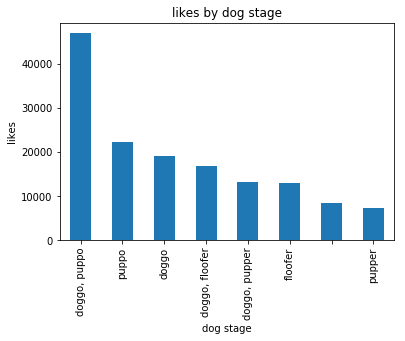

In [49]:
%matplotlib inline
dog_stages_likes.plot(kind='bar')
plt.xlabel('dog stage')
plt.ylabel('likes')
plt.title('likes by dog stage');

In [50]:
df[df['dog_stage']=='doggo, puppo']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,likes
1919,855851453814013952,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,...,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,"doggo, puppo",18683,46934


In [51]:
df[df['dog_stage']=='puppo'].sort_values(by='likes', ascending=False)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,likes
1744,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,...,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,puppo,49066,143275
1758,825535076884762624,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1,Rottweiler,0.681495,True,Tibetan_mastiff,0.147940,True,black-and-tan_coonhound,...,2017-01-29 02:44:34,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,https://twitter.com/dog_rates/status/825535076...,14,10,None,puppo,19163,56152
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,...,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,puppo,10125,48097
1993,874012996292530176,https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg,2,Cardigan,0.806674,True,Pembroke,0.116622,True,kelpie,...,2017-06-11 21:18:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,puppo,10617,34778
1481,780931614150983680,https://pbs.twimg.com/media/CtZtJxAXEAAyPGd.jpg,1,padlock,0.731564,False,necklace,0.065462,False,chain,...,2016-09-28 00:46:20,"<a href=""http://twitter.com/download/iphone"" r...",I want to finally rate this iconic puppo who t...,https://twitter.com/dog_rates/status/780931614...,13,10,None,puppo,8260,23595
2010,878776093423087618,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,2,Italian_greyhound,0.734684,True,whippet,0.150487,True,Ibizan_hound,...,2017-06-25 00:45:22,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,puppo,4169,19393
1933,859607811541651456,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,1,golden_retriever,0.895529,True,Irish_setter,0.024099,True,Labrador_retriever,...,2017-05-03 03:17:27,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,https://twitter.com/dog_rates/status/859607811...,13,10,None,puppo,1648,19080
1539,790946055508652032,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1,dishwasher,0.700466,False,golden_retriever,0.245773,True,chow,...,2016-10-25 16:00:09,"<a href=""http://twitter.com/download/iphone"" r...",This is Betty. She's assisting with the dishes...,https://twitter.com/dog_rates/status/790946055...,12,10,Betty,puppo,5305,18157
1555,793195938047070209,https://pbs.twimg.com/media/CwH_foYWgAEvTyI.jpg,2,Labrador_retriever,0.654762,True,golden_retriever,0.074100,True,Chihuahua,...,2016-10-31 21:00:23,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lily. She's pupset that her costu...,https://twitter.com/dog_rates/status/793195938...,12,10,Lily,puppo,6338,16704
1965,867421006826221569,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,1,Eskimo_dog,0.616457,True,Siberian_husky,0.381330,True,malamute,...,2017-05-24 16:44:18,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,puppo,2592,16381


The most liked dog_stage is `doggo, puppo`, but since it only contains one observation and hence the mean of likes isn't really a fair indicator, I ignored it. The next best categorie is `puppo` containing 22 observations. And by far the dog stage with the fewest likes is `pupper`.

This results are really suprising, since I would have expected that younger dogs would be cuter and hence get more likes. So my best guess would have been this order: pupper > puppo > doggo (actually: puppo > doggo > pupper).

#### 3. WeRateDogs Rating vs User Likes

In [52]:
np.corrcoef(df.rating_numerator, df.likes)

array([[ 1.        ,  0.01736249],
       [ 0.01736249,  1.        ]])

In [53]:
df.rating_numerator.value_counts()

12      446
10      417
11      392
13      253
9       150
8        95
7        52
5        33
14       33
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

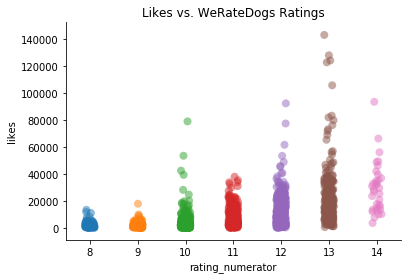

In [54]:
# calculate the correlation of WeRateDogs Rating vs User Likes

# create subset that contains only 'normal' values since the extremes
# have a too strong influence on correlation
df_sub1 = df[(df.rating_numerator > 7) & (df.rating_numerator < 15) & (df.rating_denominator == 10)]

sns.stripplot(x='rating_numerator', y='likes', data=df_sub1,   
              size=8, alpha=.5, jitter=True, edgecolor='none').set_title('Likes vs. WeRateDogs Ratings')
sns.despine()

In [55]:
np.corrcoef(df_sub1.rating_numerator, df_sub1.likes)

array([[ 1.        ,  0.48953067],
       [ 0.48953067,  1.        ]])

I wanted to know whether there is a relationship between the WeRateDogs Ratings (`rating_numerator`) and the amount of `likes`.

By calculating the correlation of both variables I firstly got the impression that there is no correlation since the Pearson correlation coefficient was near to 0. After getting rid of the extreme values there is a clear relationship between those variables. With a Pearson correlation coefficient of 49% it is not a very strong correlation but it's ok and it is also visible.